<a href="https://colab.research.google.com/github/lucaslattari/HistogramsAndBoxPlots/blob/master/Histogram_BoxPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/lucaslattari/HistogramsAndBoxPlots/master/marvel_vs_dc.csv")

#Renomeei a coluna Rate para IMDB e Metascore para Metacritic
df = df.rename(columns = {"Rate": "IMDB", "Metascore": "Metacritic"}) 

#Multipliquei pra célula de notas do IMDB (Rate) ficar na escala de 0 a 100 igual a do Metacritic
df["IMDB"] = 10 * df["IMDB"]

#Remove primeira coluna
df = df.drop(df.columns[0], axis=1)

#Converti as colunas com valores para inteiro
df["IMDB"] = df["IMDB"].astype(int)
df["Budget"] = df["Budget"].astype(int)

In [ ]:
df.head()

,Original Title,Company,IMDB,Metacritic,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,Iron Man,Marvel,79,79,126,2008,140000000,98618668,318604126,585366247
1,The Incredible Hulk,Marvel,67,61,112,2008,150000000,55414050,134806913,263427551
2,Iron Man 2,Marvel,70,57,124,2010,200000000,128122480,312433331,623933331
3,Thor,Marvel,70,57,115,2011,150000000,65723338,181030624,449326618
4,Captain America: The First Avenger,Marvel,69,66,124,2011,140000000,65058524,176654505,370569774


# Histograma com a Pandas e Matplotlib

In [ ]:
#Essa célula serve apenas para definir o estilo visual dos gráficos (tem outros nesse link aqui: https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)
plt.style.use("dark_background")

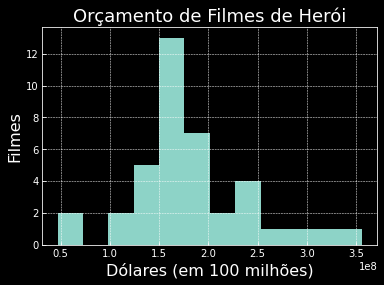

In [ ]:
#Criação do Histograma do Orçamento dos Filmes
df['Budget'].plot.hist(bins=12)

plt.title('Orçamento de Filmes de Herói', fontsize=18)
plt.xlabel('Dólares (em 100 milhões)', fontsize=16)
plt.ylabel('Filmes', fontsize=16)

plt.show()

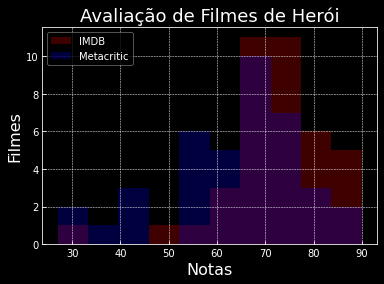

In [ ]:
#Criação do Histograma de Notas (IMDB e Metacritic)
df[['IMDB', 'Metacritic']].plot.hist(bins=10, color = ["red", 'blue'], alpha = 0.25)

plt.title('Avaliação de Filmes de Herói', fontsize=18)
plt.xlabel('Notas', fontsize=16)
plt.ylabel('Filmes', fontsize=16)

plt.show()

In [ ]:
#Criando dataframe só com os dados que precisamos
money_cols = ['Opening Weekend USA', 'Gross\xa0USA', 'Gross Worldwide']
money_df = pd.DataFrame(df, columns=money_cols)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


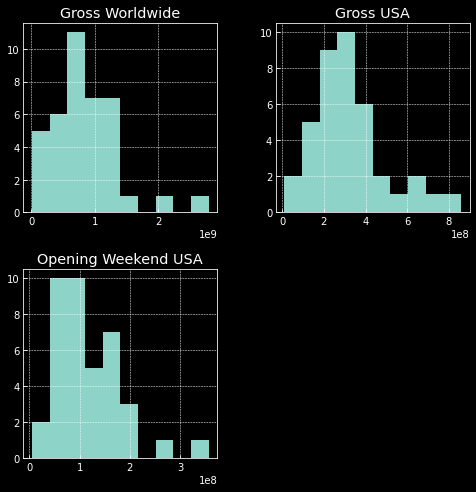

In [ ]:
#Criação de vários Histogramas com a Arrecadação dos Filmes
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
money_df.hist(ax=ax)

plt.show()

# Box Plot com a Pandas, Seaborn e Matplotlib

In [ ]:
#Essa célula serve apenas para definir o estilo visual dos gráficos (tem outros nesse link aqui: https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)
plt.style.use("bmh")

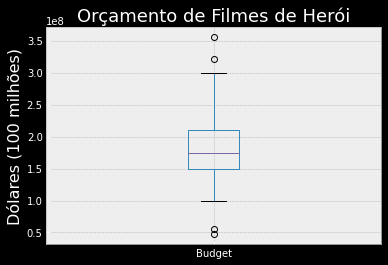

In [ ]:
#Criação do Box Plot do Orçamento dos Filmes
df['Budget'].plot.box(grid=True)

plt.title('Orçamento de Filmes de Herói', fontsize=18)
plt.ylabel('Dólares (100 milhões)', fontsize=16)

plt.show()

In [ ]:
#Dados relevantes pro box plot
df.describe().astype(int)

,IMDB,Metacritic,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
count,39,39,39,39,39,39,39
mean,72,63,2013,184102564,115109770,323265922,827572676
std,10,13,4,64410196,68667078,180708575,533231804
min,33,27,2004,47000000,5379365,10547117,10903312
25%,69,56,2011,150000000,65390931,203221666,484319291
50%,73,67,2015,175000000,96202337,318604126,746846894
75%,78,72,2017,210000000,155922453,408549171,1104658040
max,90,88,2019,356000000,357115007,858373000,2797800564


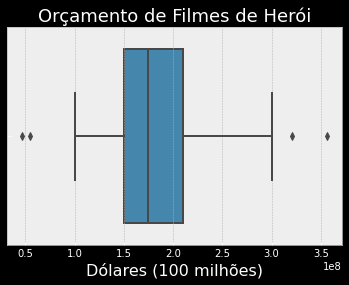

In [ ]:
#Criação do Box Plot anterior com a Seaborn
sns.boxplot(x=df["Budget"]);
plt.title('Orçamento de Filmes de Herói', fontsize=18)
plt.xlabel('Dólares (100 milhões)', fontsize=16)
plt.show()

In [ ]:
#Quem são esses outliers (mínimo)?
is_min_outlier = df['Budget'] < 100000000

df[is_min_outlier]

,Original Title,Company,IMDB,Metacritic,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
28,Jonah Hex,DC,47,33,81,2010,47000000,5379365,10547117,10903312
38,Joker,DC,87,59,122,2019,55000000,96202337,333204580,1060504580


In [ ]:
#Quem são esses outliers (máximo)?
is_max_outlier = df['Budget'] > 300000000

df[is_max_outlier]

,Original Title,Company,IMDB,Metacritic,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
18,Avengers: Infinity War,Marvel,85,68,149,2018,321000000,257698183,678815482,2048359754
21,Avengers: Endgame,Marvel,85,78,181,2019,356000000,357115007,858373000,2797800564


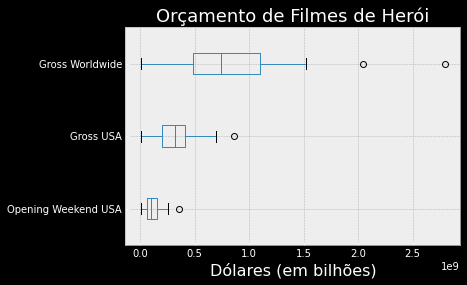

In [ ]:
#Múltiplos Boxplot de Arrecadação
df[['Opening Weekend USA', 'Gross\xa0USA', 'Gross Worldwide']].boxplot(vert=False)

plt.title('Orçamento de Filmes de Herói', fontsize=18)
plt.xlabel('Dólares (em bilhões)', fontsize=16)

plt.show()

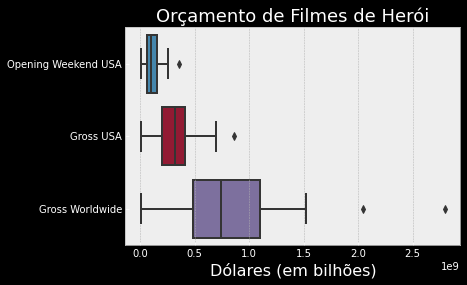

In [ ]:
#Recriação de múltiplos box plot com a Seaborn
sns.boxplot(data = df[['Opening Weekend USA', 'Gross\xa0USA', 'Gross Worldwide']], orient = 'h');

plt.title('Orçamento de Filmes de Herói', fontsize=18)
plt.xlabel('Dólares (em bilhões)', fontsize=16)

plt.show()

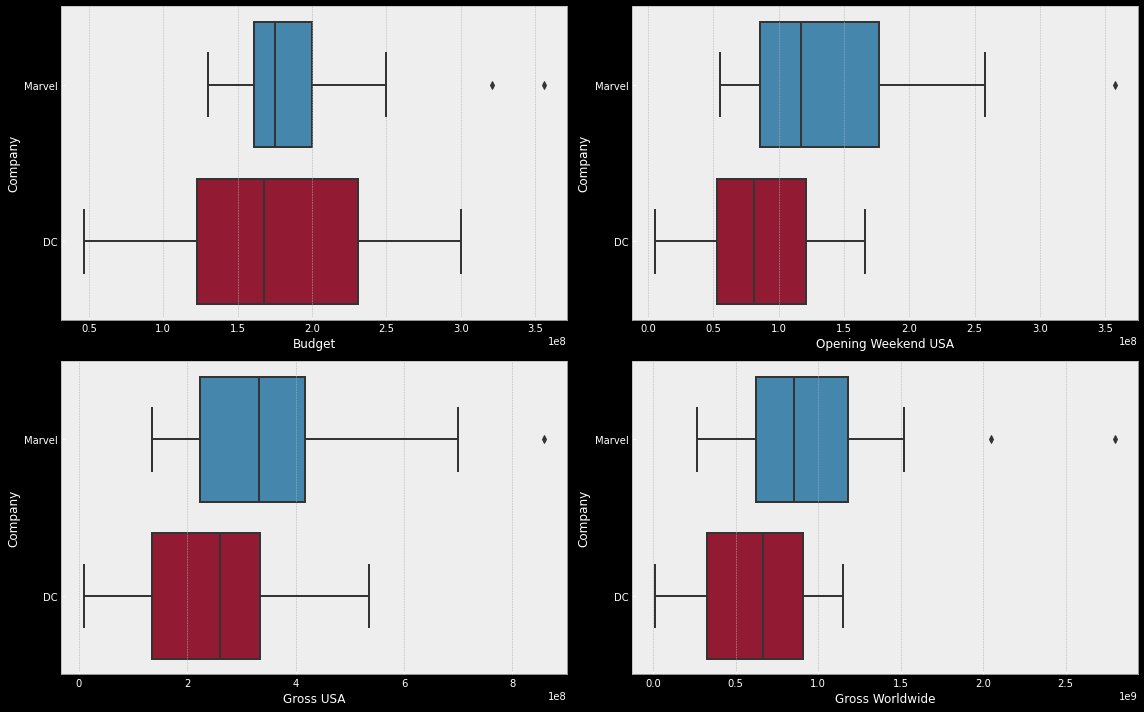

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x="Budget", y="Company", data=df, ax = axes[0, 0])
sns.boxplot(x="Opening Weekend USA", y="Company", data=df, ax = axes[0, 1])
sns.boxplot(x="Gross\xa0USA", y="Company", data=df, ax = axes[1, 0])
sns.boxplot(x="Gross Worldwide", y="Company", data=df, ax = axes[1, 1])

fig.tight_layout()